Import the libraries necesary for this model.

In [45]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

Import the data file into a dataframe and examine the features of the dataframe. 

In [46]:
#load the csv file into a dataframe
forest_info = pd.read_csv('covtype.csv')

In [47]:
#print out top rows examine what is in the dataframe
forest_info.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [48]:
# check for null values, and if there is anything that has to be hot encoded
forest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [49]:
# find the number of values and columns
forest_info.shape

(581012, 55)

In [50]:
# determine the values in the cover type column as that is the target variable
forest_info['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Condense tree types 2, 3, 4, 5, 6, and 7 into a single class to fix the class imbalance and create a binary classification problem. 

In [51]:
# there is a large class imbalance. to fix this, change data to a binary classfication problem
# wil determine if tree type is type 2 (Lodgepole Pine) or not, so change all other types to 0 value
forest_info['Cover_Type'].replace(to_replace = 1, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 3, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 7, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 6, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 5, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 4, value = 0, inplace=True)

In [52]:
forest_info['Cover_Type'].value_counts()

0    297711
2    283301
Name: Cover_Type, dtype: int64

In [53]:
# for clarification, change type 2 tree (Lodgepole Pine) to be represented as type 1
forest_info['Cover_Type'].replace(to_replace = 2, value = 1, inplace=True)

In [54]:
forest_info['Cover_Type'].value_counts()

0    297711
1    283301
Name: Cover_Type, dtype: int64

Define X and y fetaures and split data into test and train sets. 

In [55]:
# data is now properly preprocessed, now we will define X and y features
X = forest_info.drop('Cover_Type', axis=1)
y = forest_info['Cover_Type']

In [56]:
# create am 80/20 split for the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

train a basic model of the decision tree. 

In [57]:
# create a decision tree calssifier using entropy, then fit the the clasifier to the training data
DTC = DecisionTreeClassifier(criterion = 'entropy')
DT_model = DTC.fit(X_train, y_train)

In [58]:
# use the trained decision tree to make predictions of the type of tree
predict_y = DTC.predict(X_test)

create a confusion matrix to determine the true positives and true negatives, also determine the evaluation metrics. 

In [59]:
# create a confusion matrix to determine the number of true positives, true negatives, false positives, and false negatives
cm = (confusion_matrix(y_test, predict_y))
print(cm)

[[57158  2625]
 [ 2596 53824]]


In [60]:
# number of true positives are 53,795
# number of true negavites are 57,139
# number of false positives are 2,644
# number of false negatives are 2,625

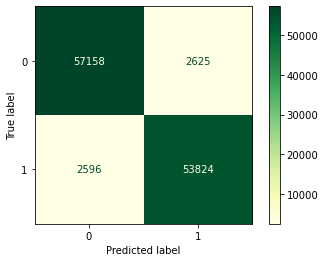

In [88]:
plot_confusion_matrix(DT_model, X_test, y_test, cmap='YlGn')
plt.savefig('original_cm')

In [18]:
# calculate accuracy of the prediction
accuracy = accuracy_score(y_test, predict_y)
print('Accuracy is :{0}'.format(accuracy))

Accuracy is :0.9551474574666747


In [19]:
precision = precision_score(y_test, predict_y)
print('Precision is :{0}'.format(precision))

Precision is :0.9541004540295119


In [20]:
recall = recall_score(y_test, predict_y)
print('Recall is :{0}'.format(recall))

Recall is :0.9534916696207019


In [21]:
F1 = f1_score(y_test, predict_y)
print('F1 is :{0}'.format(F1))

F1 is :0.9537959646821035


Trimmed Decision Tree to print an exmaple

In [23]:
pruned_DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth=2)
pruned_model = pruned_DTC.fit(X_train, y_train)
predict_y = pruned_DTC.predict(X_test)

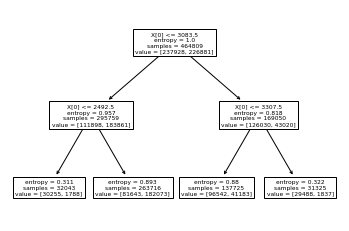

In [25]:
tree.plot_tree(pruned_model)
plt.savefig('DTC')

Tune hyperparamters to find which will create the best model. 

In [31]:
# tune hyperparameters starting with max depth
depth = np.arange(25,50,2)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

(25.0, 50.0, 0.93, 0.96)

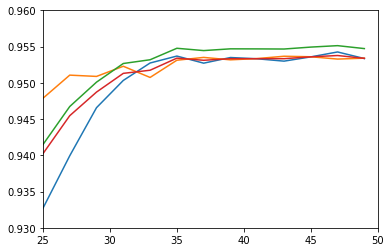

In [35]:
plt.plot(depth, precision, label = 'precision')
plt.plot(depth, recall, label = 'recall')
plt.plot(depth, accuracy, label = 'accuracy')
plt.plot(depth, F1, label = 'F1')
plt.axis([25,50,0.93,0.96])

In [25]:
sample_split = np.arange(2,20)
precision = []
recall = []
accuracy = []
F1 = []
for n in sample_split:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

(2.0, 20.0, 0.94, 0.955)

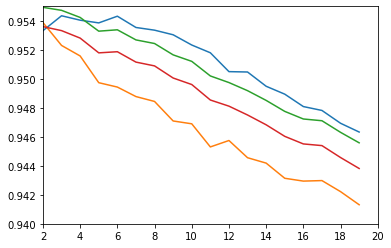

In [26]:
plt.plot(sample_split, precision)
plt.plot(sample_split, recall)
plt.plot(sample_split, accuracy)
plt.plot(sample_split, F1)
plt.axis([2,20,0.94,0.955])

In [27]:
sample_leaf = np.arange(1,10)
precision = []
recall = []
accuracy = []
F1 = []
for n in sample_leaf:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

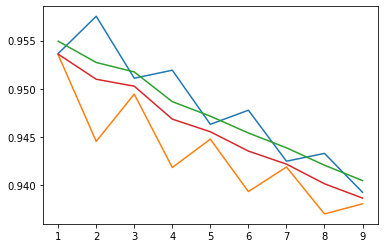

In [28]:
plt.plot(sample_leaf, precision)
plt.plot(sample_leaf, recall)
plt.plot(sample_leaf, accuracy)
plt.plot(sample_leaf, F1)

In [29]:
features = np.arange(1,40)
precision = []
recall = []
accuracy = []
F1 = []
for n in features:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

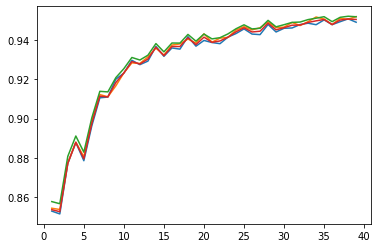

In [30]:
plt.plot(features, precision)
plt.plot(features, recall)
plt.plot(features, accuracy)
plt.plot(features, F1)

In [43]:
params = {'max_depth':[34,36,38,40],
         'min_samples_split':[2,4,6], 
          'min_samples_leaf':[1,2,3]}
precision = precision_score(y_test, predict_y)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring = 'precision')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [34, 36, 38, 40],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='precision')

In [48]:
GS_results = pd.DataFrame(gridSearch.cv_results_)
GS_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.489986,0.204123,0.099919,0.010611,34,1,2,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.941528,0.941263,0.943511,0.941863,0.943423,0.942318,0.000958,24
1,8.450010,0.183481,0.106443,0.016542,34,1,4,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.941884,0.941825,0.943953,0.943100,0.944516,0.943055,0.001080,16
2,8.299357,0.442396,0.119820,0.026693,34,1,6,"{'max_depth': 34, 'min_samples_leaf': 1, 'min_...",0.941044,0.940961,0.943182,0.942551,0.944081,0.942364,0.001214,23
3,8.514537,0.129466,0.090287,0.021949,34,2,2,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.946662,0.946698,0.948121,0.947749,0.949556,0.947757,0.001067,8
4,8.363180,0.153717,0.111497,0.023436,34,2,4,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.947396,0.947690,0.949217,0.947780,0.949535,0.948324,0.000875,1
5,8.354540,0.260469,0.090607,0.019941,34,2,6,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.944979,0.944871,0.947435,0.946905,0.949071,0.946652,0.001581,12
6,8.725309,0.202601,0.106827,0.032664,34,3,2,"{'max_depth': 34, 'min_samples_leaf': 3, 'min_...",0.939407,0.938630,0.940940,0.940301,0.941486,0.940153,0.001029,36
7,12.190233,0.230068,0.148878,0.004257,34,3,4,"{'max_depth': 34, 'min_samples_leaf': 3, 'min_...",0.939766,0.938800,0.941395,0.940965,0.941500,0.940485,0.001043,34
8,12.063421,0.074878,0.142649,0.007124,34,3,6,"{'max_depth': 34, 'min_samples_leaf': 3, 'min_...",0.939343,0.938515,0.940609,0.941537,0.941749,0.940350,0.001250,35
9,12.327160,0.190499,0.159726,0.014250,36,1,2,"{'max_depth': 36, 'min_samples_leaf': 1, 'min_...",0.941708,0.941859,0.943674,0.942755,0.943847,0.942769,0.000887,17


In [46]:
GS_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,8.363180,0.153717,0.111497,0.023436,34,2,4,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.947396,0.947690,0.949217,0.947780,0.949535,0.948324,0.000875,1
22,12.804200,0.199606,0.169443,0.010121,38,2,4,"{'max_depth': 38, 'min_samples_leaf': 2, 'min_...",0.946438,0.947314,0.949092,0.948625,0.949683,0.948230,0.001188,2
12,12.599516,0.193846,0.172734,0.023782,36,2,2,"{'max_depth': 36, 'min_samples_leaf': 2, 'min_...",0.946811,0.947409,0.948581,0.948224,0.950045,0.948214,0.001105,3
13,12.690775,0.159231,0.151440,0.025315,36,2,4,"{'max_depth': 36, 'min_samples_leaf': 2, 'min_...",0.946373,0.947100,0.948875,0.948181,0.950319,0.948169,0.001378,4
30,12.240342,0.280613,0.169456,0.008683,40,2,2,"{'max_depth': 40, 'min_samples_leaf': 2, 'min_...",0.946810,0.947023,0.948659,0.948492,0.949824,0.948162,0.001117,5
31,12.379768,0.248626,0.157611,0.012142,40,2,4,"{'max_depth': 40, 'min_samples_leaf': 2, 'min_...",0.946779,0.947310,0.948402,0.947811,0.950077,0.948076,0.001135,6
21,12.852028,0.231639,0.167812,0.017100,38,2,2,"{'max_depth': 38, 'min_samples_leaf': 2, 'min_...",0.946411,0.946806,0.948848,0.947674,0.950172,0.947982,0.001378,7
3,8.514537,0.129466,0.090287,0.021949,34,2,2,"{'max_depth': 34, 'min_samples_leaf': 2, 'min_...",0.946662,0.946698,0.948121,0.947749,0.949556,0.947757,0.001067,8
32,12.107531,0.233273,0.159133,0.015846,40,2,6,"{'max_depth': 40, 'min_samples_leaf': 2, 'min_...",0.946131,0.946261,0.948188,0.946387,0.948583,0.947110,0.001052,9
14,12.604900,0.336054,0.154823,0.010004,36,2,6,"{'max_depth': 36, 'min_samples_leaf': 2, 'min_...",0.945342,0.945400,0.947685,0.947096,0.948964,0.946897,0.001385,10


In [89]:
updated_DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth=34, min_samples_split=4, min_samples_leaf=2)
updated_model = DTC.fit(X_train, y_train)

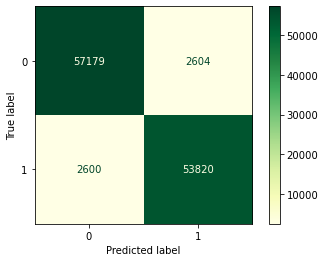

In [92]:
cm = (confusion_matrix(y_test, predict_y))
plot_confusion_matrix(DT_model, X_test, y_test, cmap='YlGn')
plt.savefig('secondary_cm')

In [93]:
precision = precision_score(y_test, predict_y)
print('Precision is :{0}'.format(precision))
recall = recall_score(y_test, predict_y)
print('Recall is :{0}'.format(recall))
accuracy = accuracy_score(y_test, predict_y)
print('Accuracy is :{0}'.format(accuracy))
F1 = f1_score(y_test, predict_y)
print('F1 is :{0}'.format(F1))

Precision is :0.953497847614661
Recall is :0.9539879475363346
Accuracy is :0.9550700067984476
F1 is :0.9537428346135786


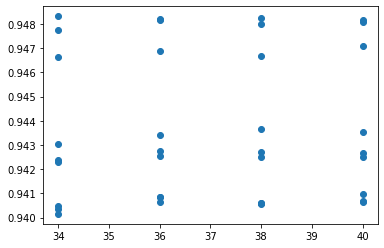

In [55]:
plt.scatter(GS_results['param_max_depth'], GS_results['mean_test_score'])

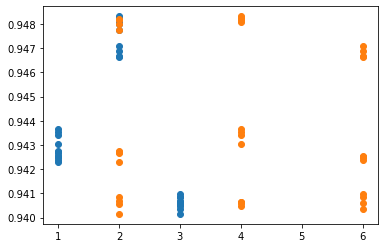

In [54]:
plt.scatter(GS_results['param_min_samples_leaf'], GS_results['mean_test_score'])
plt.scatter(GS_results['param_min_samples_split'], GS_results['mean_test_score'])